In [1]:
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install matplotlib
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns
#pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics #to find performance(accuracy)

In [2]:
data=pd.read_csv("./diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().values.any()

False

In [5]:
data.rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP'},inplace=True)  #replacing the attributes

In [6]:
data.head(5)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()  #it gives statics of data

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


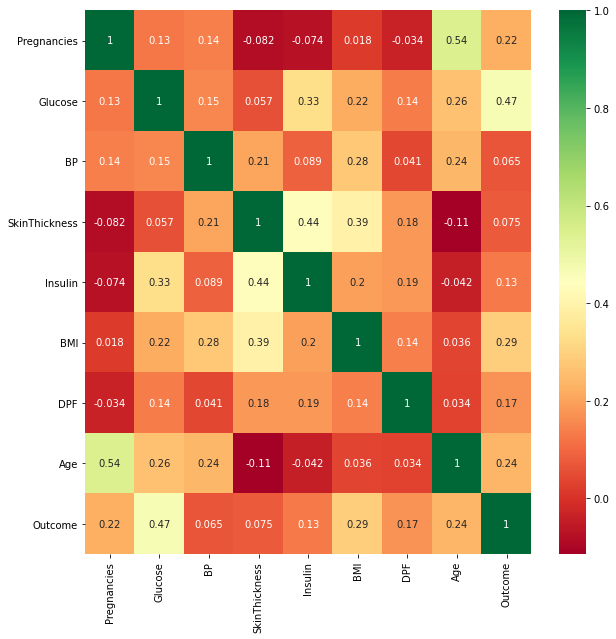

In [8]:
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#corelation map

In [9]:
data.corr()  #same as above

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Pedigree Function : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])
#data cleaning finding the zeros except mail and femail

Number of zeros in Glocose :  5
Number of zeros in Blood Pressure :  35
Number of zeros in Skin Thickness :  227
Number of zeros in Insulin :  374
Number of zeros in BMI :  11
Number of zeros in Diabetes Pedigree Function :  0
Number of zeros in Age :  0


In [11]:
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BP"]=data["BP"].replace(0,data["BP"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["DPF"]=data["DPF"].replace(0,data["DPF"].mean())
data["Age"]=data["Age"].replace(0,data["Age"].mean())
#Replaceing the zeroes with mean values

In [12]:
print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Prediction Factor : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])
#checking wheather zeroes are present

Number of zeros in Glocose :  0
Number of zeros in Blood Pressure :  0
Number of zeros in Skin Thickness :  0
Number of zeros in Insulin :  0
Number of zeros in BMI :  0
Number of zeros in Diabetes Prediction Factor :  0
Number of zeros in Age :  0


In [13]:
#counting invidual outcomes
positive_outcome=len(data.loc[data["Outcome"]==1])
negative_outcome=len(data.loc[data["Outcome"]==0])
(positive_outcome,negative_outcome)

(268, 500)

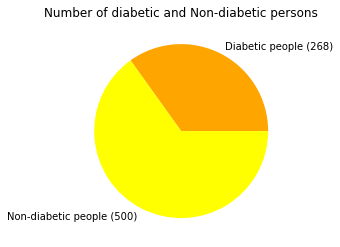

In [14]:
y=np.array([positive_outcome,negative_outcome])
mylabels=["Diabetic people (268)","Non-diabetic people (500)"]
plt.pie(y,labels=mylabels,colors=["orange","yellow"])
plt.title("Number of diabetic and Non-diabetic persons")
plt.show()
#showing in graph

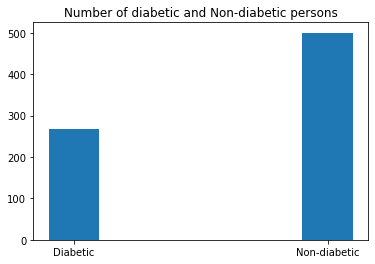

In [15]:
df={'Diabetic':positive_outcome,'Non-diabetic':negative_outcome}
A=list(df.keys())
B=list(df.values())
plt.bar(A,B,width=0.2)
plt.title("Number of diabetic and Non-diabetic persons")
plt.show()

# Traning starts

In [16]:
X=data.drop(columns=["Outcome"])  #droping the outcome in x
Y=data["Outcome"]    #keep out come in y 
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.30,random_state=10)  #tesing only 30% of data

In [17]:
model=RandomForestClassifier(random_state=10)
model.fit(X_train,Y_train.ravel())  #model learn from x and predict y.
pred=model.predict(X_test)     #predicting the outcomes of test data.
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [19]:
acc=metrics.accuracy_score(Y_test,pred)
print("\n\n ACCURACY OF THE MODEL : ",acc)
print("\n")

#comparing the actual and predict test data given accuracy



 ACCURACY OF THE MODEL :  0.750465549348231




In [21]:
def prediction_calculator(n):
    for i in range(n):
        print("\nENTER THE DETAILS FOR PERSON : ",(i+1))
        Gender_ip=input("\nGENDER M/F/m/f: ")
        if(Gender_ip=="M" or Gender_ip=="m"):
            Preg_ip=0
        else:
            Preg_ip=input("Number of Pregnancies : ")
        Age_ip=input("Age : ")
        Bmi_ip=input("BMI : ")
        Glucose_ip=input("Glucose level : ")
        Insulin_ip=input("Insulin level : ")
        Bp_ip=input("BP level : ")
        St_ip=input("Skin Thickness : ")
        Dpf_ip=input("Diabetes pedigree function : ")
        
        c=np.array([Preg_ip,Glucose_ip,Bp_ip,St_ip,Insulin_ip,Bmi_ip,Dpf_ip,Age_ip])
        c_rs=c.reshape(1,-1)
        pred=model.predict(c_rs)
        
        if pred==1:
            print("DIABETIC PERSON !!")
        else:
            print("NON-DIABETIC PERSON :)")
            
no_of_people=int(input("\n ENTER NUMBER OF PEOPLE : "))
prediction_calculator(no_of_people)



 ENTER NUMBER OF PEOPLE : 1

ENTER THE DETAILS FOR PERSON :  1

GENDER M/F/m/f: f
Number of Pregnancies : 2
Age : 12
BMI : 22
Glucose level : 70
Insulin level : 50
BP level : 120
Skin Thickness : 455
Diabetes pedigree function : 54
NON-DIABETIC PERSON :)


# Some  important points


In [ ]:
The BMI values of 18.5 to 24.9 as normal,
less than 18.5 underweight, 
25 to 29 overweight,
and above 29 as obese apply equally to men as well as women.
A woman have a BMI of 35 is exposed to the same health risks as a man having a similar BMI.


->glucose level:60-140 normal
    101 to >126 diabetes
    
->BP level=>120/80
->skin thickness->3-18